In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib import rc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, classification_report #explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #SparsePCA, NMF
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [2]:
# Apply sns styling to plots
sns.set()

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})
%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

In [3]:
city_happiness_df = pd.read_csv('data/cities-happiness.csv')
city_happiness_df.set_index('city', drop=True,inplace=True)
city_happiness_df.head()

,avg_happiness_rating
city,
Tashkent,8.390
San Miguelito,8.372
San Jose,8.347
Accra,8.297
Panama City,8.286


In [35]:
city_venue_counts = pd.read_csv('data/counted_happiness_venues.csv',index_col=0)
city_venue_counts.fillna(0, inplace=True)
city_venue_counts

,"Богданов и партнеры""""""",""""" Сары Озон""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","34""""""","38""""""",...,Zoo Exhibit,Çöp Şiş Place,"Банкомат 24/7""","Ришон ле Цион""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""","חולון""",area_sqkm
City,,,,,,,,,,,,,,,,,,,,,
Chisinau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.051151
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.621941
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4016.966775
Ulaanbaatar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8897.100096
Guangzhou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8788.365017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451.135580
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.268361
Izmir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26592.805085


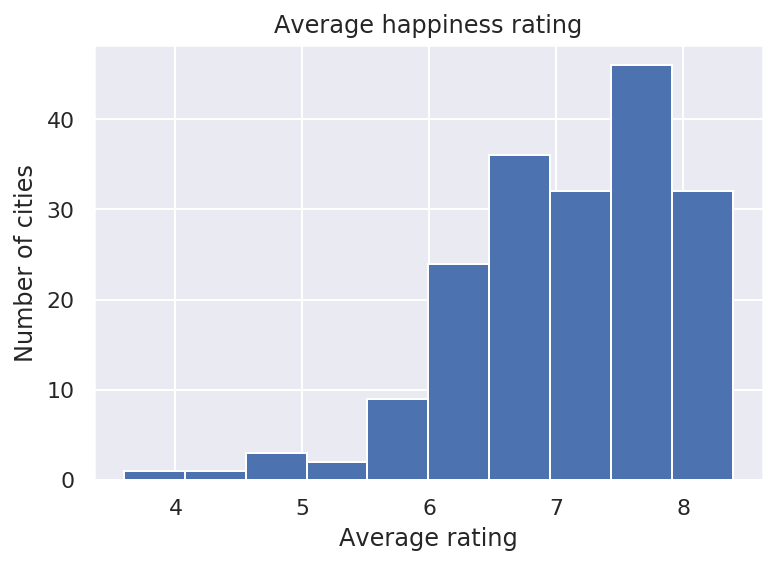

In [32]:
city_happiness_df.hist()
plt.title('Average happiness rating')
plt.xlabel('Average rating')
plt.ylabel('Number of cities')
plt.show()

In [36]:
happiness_venues_df = city_venue_counts.join(city_happiness_df)
happiness_venues_df

,"Богданов и партнеры""""""",""""" Сары Озон""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","34""""""","38""""""",...,Çöp Şiş Place,"Банкомат 24/7""","Ришон ле Цион""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""","חולון""",area_sqkm,avg_happiness_rating
City,,,,,,,,,,,,,,,,,,,,,
Chisinau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.051151,6.759
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.621941,6.854
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4016.966775,5.641
Ulaanbaatar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8897.100096,7.985
Guangzhou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8788.365017,7.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451.135580,7.861
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.268361,NaN
Izmir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26592.805085,6.139


In [37]:
happiness_venues_df.at['Washington, D.C.', 'avg_happiness_rating'] = city_happiness_df.loc['Washington D.C']
happiness_venues_df.at['Toronto', 'avg_happiness_rating'] = city_happiness_df.loc['Toronto Metro']
happiness_venues_df.at['São Paulo', 'avg_happiness_rating'] = city_happiness_df.loc['Sao Paulo']
happiness_venues_df.at['Panama', 'avg_happiness_rating'] = city_happiness_df.loc['Panama City']
happiness_venues_df.at['New York City', 'avg_happiness_rating'] = city_happiness_df.loc['New York']
happiness_venues_df.at['Bangkok', 'avg_happiness_rating'] = city_happiness_df.loc['Metro Bangkok']
happiness_venues_df.at['Manila', 'avg_happiness_rating'] = city_happiness_df.loc['Metro Manila']
happiness_venues_df.at['Kabul Center', 'avg_happiness_rating'] = city_happiness_df.loc['Kabul']
happiness_venues_df.at['Ho Chi Minh City', 'avg_happiness_rating'] = city_happiness_df.loc['Ho Chi Minh']
happiness_venues_df.at['Bogotá', 'avg_happiness_rating'] = city_happiness_df.loc['Bogota']
happiness_venues_df.at['Lima', 'avg_happiness_rating'] = city_happiness_df.loc['Lima Metro']
happiness_venues_df.at['Saint Petersburg', 'avg_happiness_rating'] = city_happiness_df.loc['St. Petersburg']
happiness_venues_df.at["Sana'a", 'avg_happiness_rating'] = city_happiness_df.loc['Sanaa']

In [38]:
missing_happy_cities = happiness_venues_df[happiness_venues_df.isnull().any(axis=1)]
missing_happy_cities

,"Богданов и партнеры""""""",""""" Сары Озон""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","34""""""","38""""""",...,Çöp Şiş Place,"Банкомат 24/7""","Ришон ле Цион""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""","חולון""",area_sqkm,avg_happiness_rating
City,,,,,,,,,,,,,,,,,,,,,


In [39]:
happiness_venues_df

,"Богданов и партнеры""""""",""""" Сары Озон""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","34""""""","38""""""",...,Çöp Şiş Place,"Банкомат 24/7""","Ришон ле Цион""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""","חולון""",area_sqkm,avg_happiness_rating
City,,,,,,,,,,,,,,,,,,,,,
Chisinau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.051151,6.759
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.621941,6.854
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4016.966775,5.641
Ulaanbaatar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8897.100096,7.985
Guangzhou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8788.365017,7.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451.135580,7.861
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.268361,8.155
Izmir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26592.805085,6.139


In [47]:
venue_density = happiness_venues_df.copy()
venue_density.iloc[:,:-2] = venue_density.iloc[:,:-2].div(happiness_venues_df.area_sqkm, axis=0)
venue_density.drop('area_sqkm', axis=1, inplace=True)
venue_density = venue_density.astype(float)
venue_density

,"Богданов и партнеры""""""",""""" Сары Озон""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","34""""""","38""""""",...,Zoo Exhibit,Çöp Şiş Place,"Банкомат 24/7""","Ришон ле Цион""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""","חולון""",avg_happiness_rating
City,,,,,,,,,,,,,,,,,,,,,
Chisinau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.759
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003219,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.854
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.641
Ulaanbaatar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.985
Guangzhou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000341,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.861
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003173,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.155
Izmir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000338,0.000075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.139


In [52]:
venue_density.iloc[:,:-1]

,"Богданов и партнеры""""""",""""" Сары Озон""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","34""""""","38""""""",...,Zoo,Zoo Exhibit,Çöp Şiş Place,"Банкомат 24/7""","Ришон ле Цион""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи.""","חולון"""
City,,,,,,,,,,,,,,,,,,,,,
Chisinau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003219,0.003219,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulaanbaatar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000112,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guangzhou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000114,0.000341,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boston,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.003173,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Izmir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000226,0.000338,0.000075,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X = venue_density.iloc[:,:-1]
y = venue_density.iloc[:,-1:].avg_happiness_rating.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('reducer', PCA(n_components=0.9)), 
    ('classifier', LinearRegression())
])
pipe.fit(X_train, y_train)
pipe

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=0.9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [73]:
y_pred = pipe.predict(X_test)

In [75]:
pipe.score(X_test, y_test)

-22.59631436858112

In [74]:
pd.DataFrame({'predicted': y_pred, 'true': y_test})

,predicted,true
0,7.003409,7.892
1,7.243211,8.204
2,6.237479,6.139
3,7.031559,8.203
4,7.605417,7.488
5,7.345664,6.798
6,7.118207,7.639
7,7.173277,7.825
8,5.658028,6.933
9,7.239997,8.130


In [80]:
# Determine the number of extracted features from PCA
len(pipe[2].coef_)

34